# The idea

We are writing a piece of code that takes two inputs:
- a summary spreadsheet, and
- the (saved and loaded) output of `stetson_vs_mag`

It performs this:
- for each K magnitude of an object, 
- - interpolates the Stetson threshold onto that exact K mag,
- - subtracts it from the actual Stetson value

and outputs:
- an edited version of the spreadsheet with a new column.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from wuvars.data import spreadsheet

spread = spreadsheet.load_v2()

In [2]:
load_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/stetson_v_mag"

# for wserv in [5, 7, 8]:
#     r997 = np.load(
#         os.path.join(load_dir, f"WSERV{wserv}_result_grid_997.npy"),
#     )
#     r95 = np.load(
#         os.path.join(load_dir, f"WSERV{wserv}_result_grid_95.npy"),
#     )
#     r50 = np.load(
#         os.path.join(load_dir, f"WSERV{wserv}_result_grid_50.npy"),
#     )

In [42]:
%run ../variability_selection_curved.py

In [43]:
curve_Stetson

<function __main__.curve_Stetson(ds, magnitudes, thresholds, suffix, input_column='Stetson_JHK')>

In [9]:
wserv = 7
ds = spread[f'wserv{wserv}']
r997 = np.load(
    os.path.join(load_dir, f"WSERV{wserv}_result_grid_997.npy"),
)
r95 = np.load(
    os.path.join(load_dir, f"WSERV{wserv}_result_grid_95.npy"),
)
r50 = np.load(
    os.path.join(load_dir, f"WSERV{wserv}_result_grid_50.npy"),
)



In [44]:
curve_Stetson(ds, r997[0], r997[1], '_m_997')
curve_Stetson(ds, r95[0], r95[1], '_m_95')

In [45]:
ds['variability']

,J_red_chisq,H_red_chisq,K_red_chisq,Stetson_HK,Stetson_JK,Stetson_JH,Stetson_JHK,Stetson_JHK_m_997,Stetson_JHKm_997,Stetson_JHK_m_95
SOURCEID,,,,,,,,,,
44508746088477,-0.0,-0.00000,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44508746088478,-0.0,-0.00000,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44508746088482,-0.0,-0.00000,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44508746088484,-0.0,-0.00000,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44508746088487,-0.0,-0.00000,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
44508746139098,-0.0,-0.00000,1.217973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44508746139125,-0.0,1.75644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44508746139158,-0.0,-0.00000,0.755624,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
suffix = '_m_997'

v_jhk = sv_jhk(ds, Stetson_cutoff=0, suffix=suffix)

In [46]:
suffix_95 = '_m_95'

v_jhk_cand = sv_jhk(ds, Stetson_cutoff=0, suffix=suffix_95)

In [29]:
np.sum(v_jhk)

1145

In [51]:
np.sum(v_jhk_cand & q2 & ~v_jhk)

230

In [30]:
import wuvars.analysis.variability_selection as sv

q2 = sv.sq2(ds, 80, 160)

In [31]:
np.sum(q2 & v_jhk)

86

In [32]:
old_v_jhk = sv.sv_jhk(ds, Stetson_cutoff=1.6)

In [33]:
np.sum(q2 & old_v_jhk)

71

(0.01, 95.7290582336422)

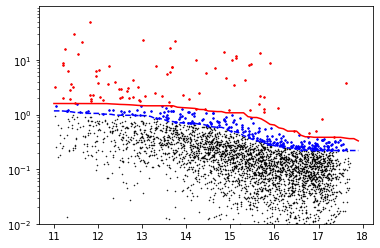

In [52]:
# plot the objects selected as new variables in a Stetson vs K mag plot

plt.plot(ds[q2]['median']['KAPERMAG3'], ds[q2]['variability']['Stetson_JHK'], 'k.', ms=1)
plt.plot(ds[q2 & v_jhk]['median']['KAPERMAG3'], ds[q2 & v_jhk]['variability']['Stetson_JHK'], 'r.', ms=3)
plt.plot(ds[q2 & v_jhk_cand & ~v_jhk]['median']['KAPERMAG3'], ds[q2 & v_jhk_cand & ~v_jhk]['variability']['Stetson_JHK'], 'b.', ms=3)

plt.plot(r997[0], r997[1], 'r-')
plt.plot(r95[0], r95[1], 'b--')

plt.semilogy()
plt.ylim(1e-2, None)